# Data Augmentation on Images using Torchvision

In PyTorch, the torchvision.transforms module provides a variety of pre-built transformations that can be easily applied to image datasets. By defining a sequence of transformations using `transforms.Compose`, you can create a comprehensive augmentation pipeline that modifies images in multiple ways, enhancing the model's ability to learn robust features.

For more detailed information please refer https://pytorch.org/vision/stable/transforms.html.



**How Data Augmentation Works**

* *Static Dataset Size:* The number of samples in your dataset remains unchanged.
* *Dynamic Augmentation:* Each time a sample is accessed during training, it is augmented on the fly according to the defined transformations.
* *Increased Data Variability:* The model sees different versions of the same data point across different epochs, which helps it generalize better.

**References:**
* https://www.kaggle.com/code/mohamedmustafa/7-data-augmentation-on-images-using-pytorch
* https://anushsom.medium.com/image-augmentation-for-creating-datasets-using-pytorch-for-dummies-by-a-dummy-a7c2b08c5bcb

## **Imports**

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

## **Load Image**

In [ ]:
import gdown

images = {
    "https://drive.google.com/file/d/1Guet6ZYC2k44B1z4zA0j7oiIW4yu1alE/view?usp=sharing": "aug.jpg",
    }

for url, file_name in images.items():
    gdown.download(url, file_name, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1Guet6ZYC2k44B1z4zA0j7oiIW4yu1alE
To: /content/aug.jpg
100%|██████████| 111k/111k [00:00<00:00, 47.9MB/s]


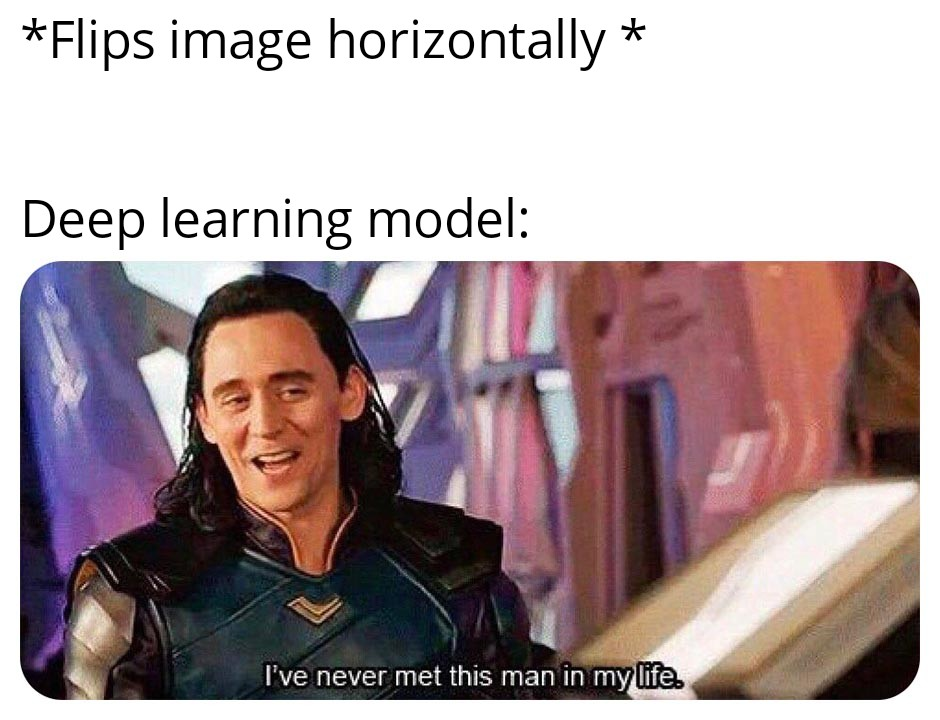

In [ ]:
img = cv2.imread("aug.jpg")

cv2_imshow(img)

## **Helper**

In [ ]:
def plot_side_by_side(img_1, img_2, title1="Original Image", title2="Processed Image"):
    """
    A function to plot two images side by side.
    """
    if len(img_1.shape) == 3 or len(img_2.shape) == 3:
        img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
        img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img_1, cmap='gray')
    axs[1].imshow(img_2, cmap='gray')

    axs[0].set_title(title1)
    axs[1].set_title(title2)

## **Resize Transformation**

https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.Resize.html#torchvision.transforms.v2.Resize

Note: We will use `transforms.ToPILImage()` step in the transformation pipeline for the sake of compatibility with PIL-based Transformations:

> Many image transformations in the `torchvision.transforms` module are designed to work with PIL images. For instance, transformations like `transforms.Resize`, `transforms.CenterCrop`, and `transforms.ColorJitter` expect the input image to be a PIL Image. By converting the input to a PIL Image first, you ensure compatibility with these transformations.

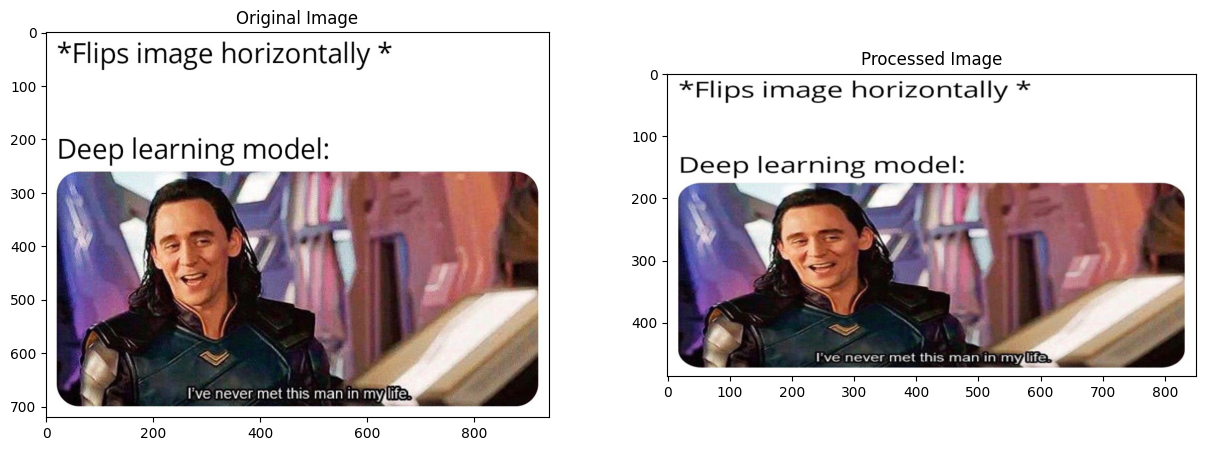

In [ ]:
resize_trf = transforms.Compose([
   transforms.ToPILImage(),
   transforms.Resize(size=(486,850)),
])

resized_img = resize_trf(img)
plot_side_by_side(img, np.array(resized_img))

## **Horizontal Flipping Transformation**

https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.RandomHorizontalFlip.html#torchvision.transforms.v2.RandomHorizontalFlip

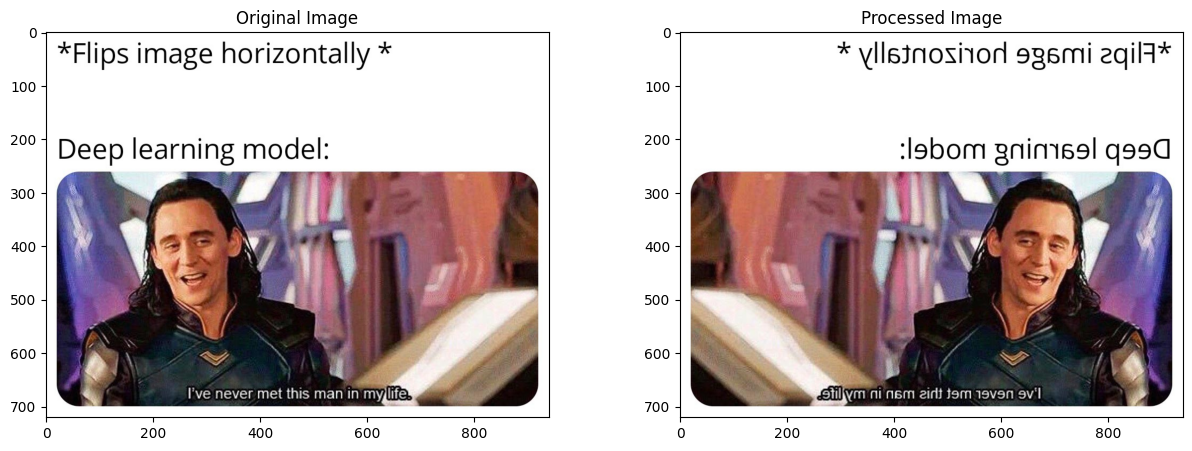

In [ ]:
'''
flip an image horizontally in a random fashion with a given probability p

If p = 1, it returns a horizontally flipped image.

If p = 0, It returns the original image.

If p is in the range (0,1), then the probability to return the horizontally flipped image is p.
'''
horizontal_flip_trf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=1)
])

# Testing The Transformation...
hor_flipped_img = horizontal_flip_trf(img)

plot_side_by_side(img, np.array(hor_flipped_img))

## **Vertical Flipping Transformation**

https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.RandomVerticalFlip.html#torchvision.transforms.v2.RandomVerticalFlip

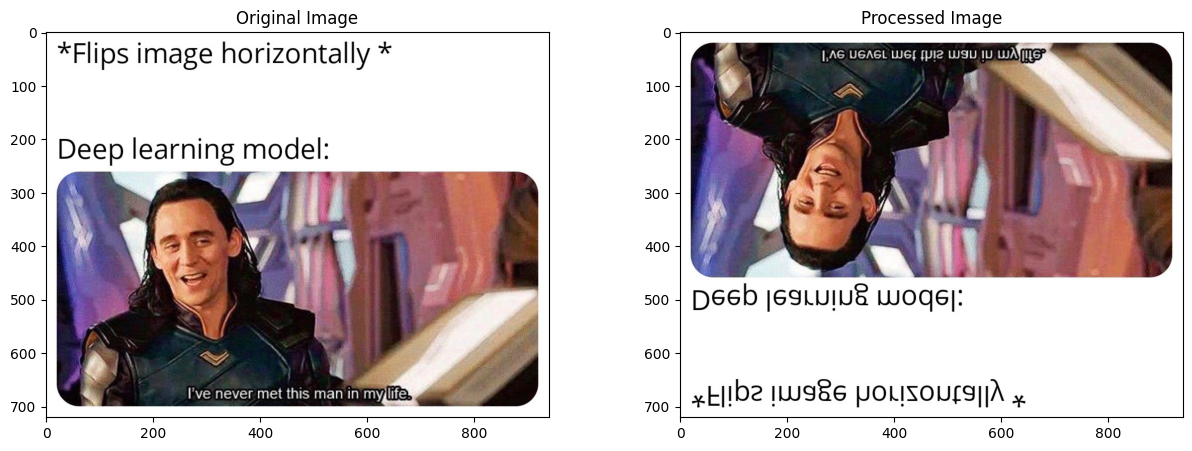

In [ ]:
'''
flip an image Vertically in a random fashion with a given probability p

If p = 1, it returns a Vertically flipped image.

If p = 0, It returns the original image.

If p is in the range (0,1), then the probability to return the Vertically flipped image is p.
'''
vertical_flip_trf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomVerticalFlip(p=1)
])


ver_flipped_img = vertical_flip_trf(img)

plot_side_by_side(img, np.array(ver_flipped_img))

## **Color Transformation**

https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.ColorJitter.html#torchvision.transforms.v2.ColorJitter

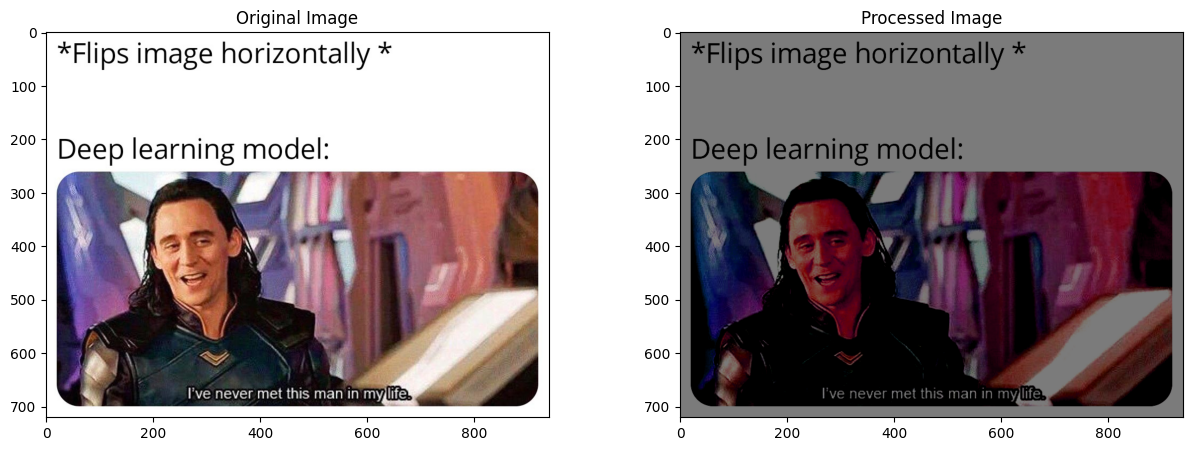

In [ ]:
#  randomly change the brightness, contrast, saturation and hue of an image
#  Learn More about brightness, contrast, ... factor [https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html]
color_trf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=(0.1, 0.6), contrast=1, saturation=0, hue=0.2)
])

# Testing The Transformation...
color_trf_img = color_trf(img)

plot_side_by_side(img, np.array(color_trf_img))

## **Crop Transformation**

https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.RandomCrop.html#torchvision.transforms.v2.RandomCrop

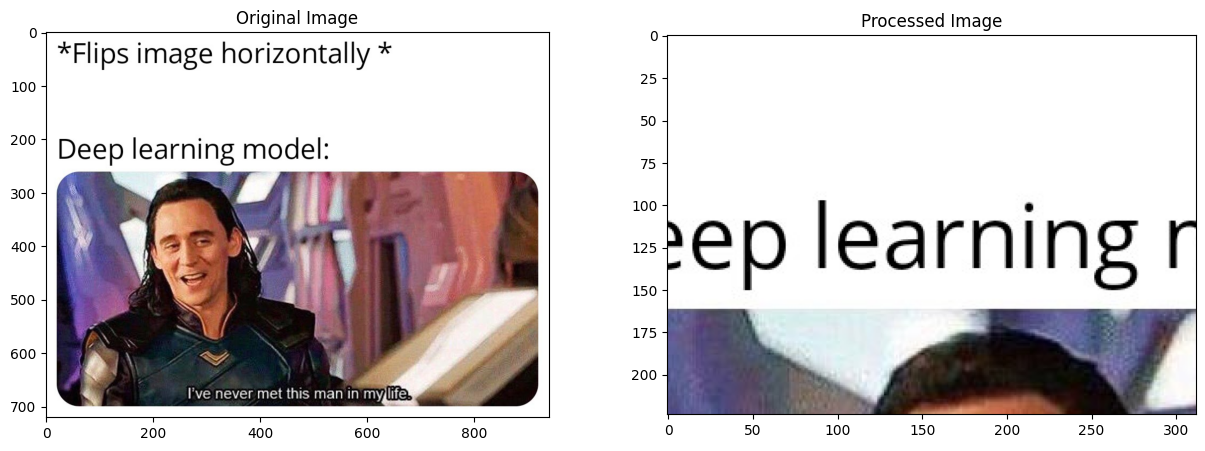

In [ ]:
# crop an image at a random location with the given size
# if the size is one number the result image will be squared img
crop_trf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(size=(224,312))
])

# Testing The Transformation...
cropped_img = crop_trf(img)
plot_side_by_side(img, np.array(cropped_img))

## **Rotate Transformation**

https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.RandomRotation.html#torchvision.transforms.v2.RandomRotation

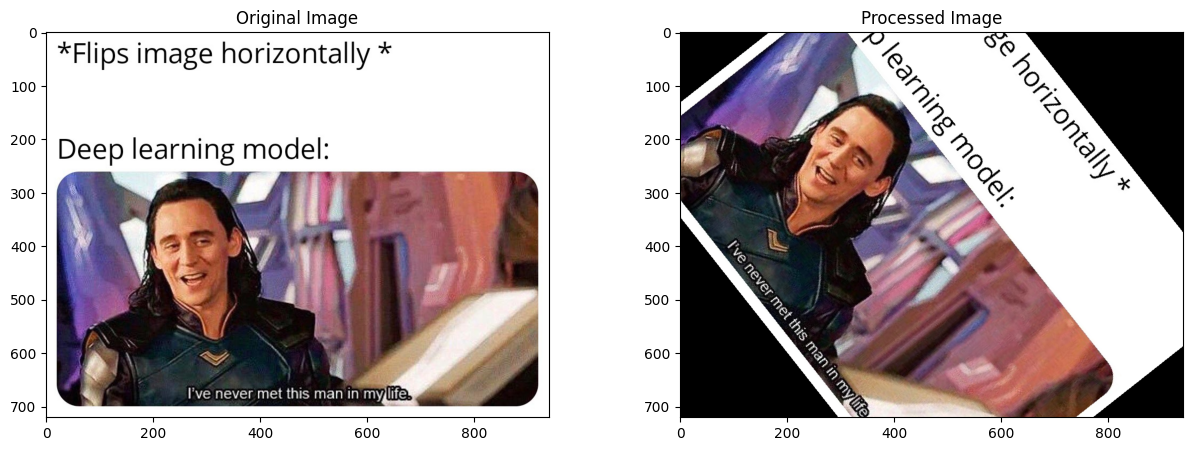

In [ ]:
'''
 Rotate the image by angle.
'degrees' parameter is a range of degrees to select from,
if degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees).
'''
rotate_trf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(degrees=66)
])

# Testing The Transformation...
rotated_img = rotate_trf(img)
plot_side_by_side(img, np.array(rotated_img))

## **Image Normalization**

https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.Normalize.html#torchvision.transforms.v2.Normalize

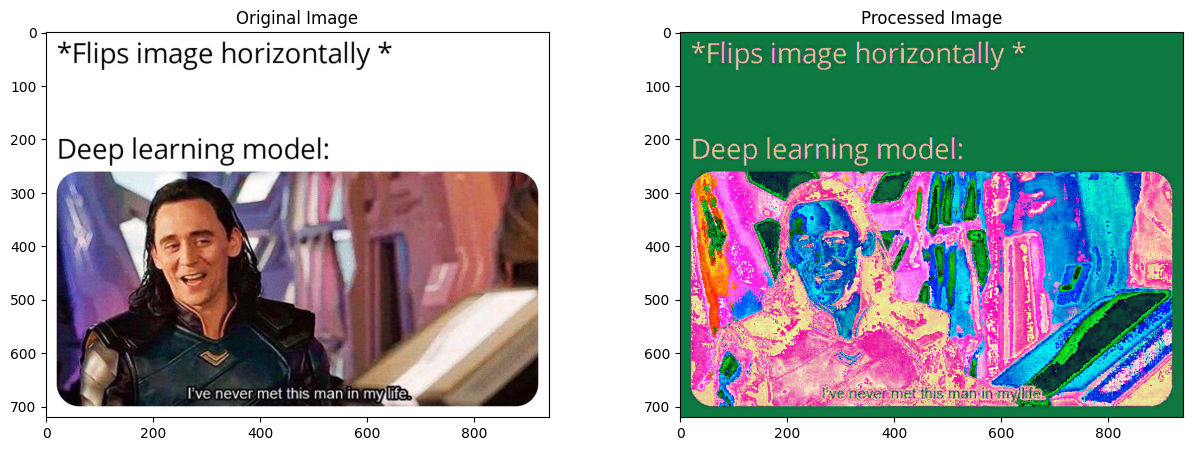

In [ ]:
# Normalize a tensor image with mean and standard deviation. This transform does not support PIL Image.
# Note that we have 3 values to mean and std cuz our img contains 3 channels so we have mean,std for each channel
# the equation will applied is (pixel_value - channel_mean / channel_std)

normalize_trf = transforms.Compose([
    transforms.ToPILImage(),# first we need to convert our img to PIL format which can work with transforms
    transforms.ToTensor(),# we need to convert PIL img to tensor because normalize doesn't support PIL imgs
    transforms.Normalize(mean=[5,0.9,0.6], std=[1.45,0.21,7.12]),
    transforms.ToPILImage()# after normalize we convert again to PIL img, which enable us to show the img
])

# Testing The Transformation...
normalized_img = normalize_trf(img)
plot_side_by_side(img, np.array(normalized_img))

## **Gaussian Blur**

https://pytorch.org/vision/stable/generated/torchvision.transforms.GaussianBlur.html#torchvision.transforms.GaussianBlur

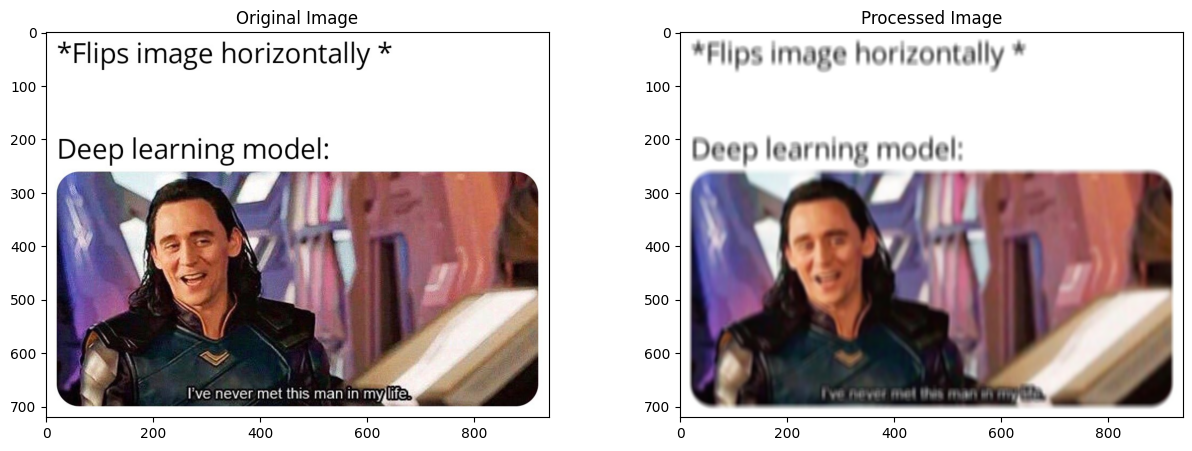

In [ ]:

gaussian_blur_trf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.GaussianBlur(kernel_size = (7,13), sigma = (6 , 7))
])

# Testing The Transformation...
blurred_img = gaussian_blur_trf(img)
plot_side_by_side(img, np.array(blurred_img))

## **Random Invert**

https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomInvert.html#torchvision.transforms.RandomInvert

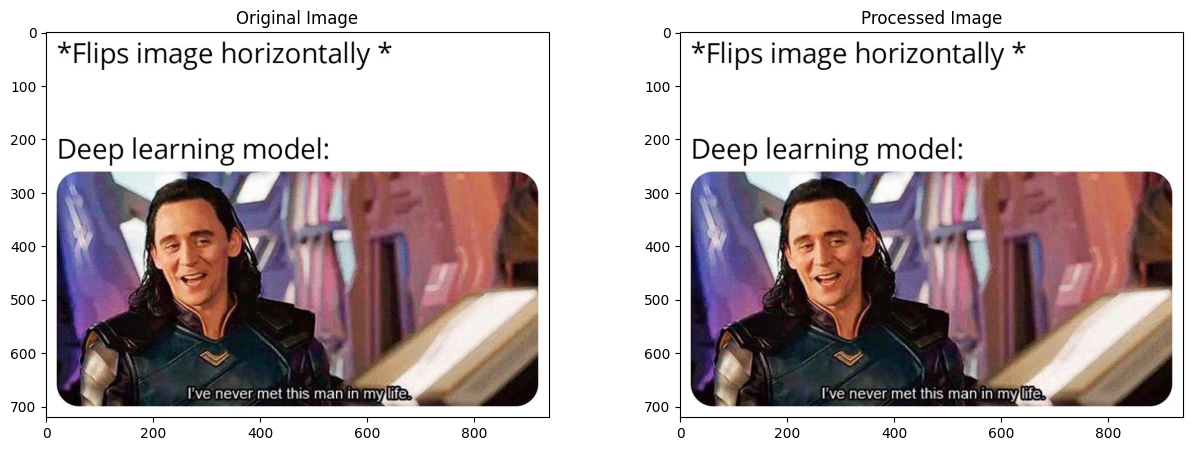

In [ ]:
"""
The random invert function inverts the given image randomly with a given probability.
This function helps create variety in the data set.
"""


invert_trf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomInvert(p = 0.5)
])

# Testing The Transformation...
inverted_img = invert_trf(img)
plot_side_by_side(img, np.array(inverted_img))

# Skin Cancer Classification with ResNet-18

You can find the dataset [here](https://drive.google.com/drive/folders/1Aid67MXI7ks0l3y3CsLv4om4n_5zG9dG).

Reference: https://medium.com/@kirudang/deep-learning-computer-vision-using-transfer-learning-resnet-18-in-pytorch-skin-cancer-8d5b158893c5

## **Imports**

In [ ]:
# Set up CUDA in OS
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Import libabries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import seaborn as sns
import pandas as pd
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import torchvision.transforms as T
from torchvision import datasets, models, transforms
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import time
import copy

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## **Setup the GPU**

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
use_cuda = torch.cuda.is_available()
use_cuda

True

##**Get the Data**

In [ ]:
root = f"/content/drive/MyDrive/EE417/Labs/Week-11/Skin cancer dataset"

train_dir = f"{root}/train/"
test_dir = f"{root}/test/"

This is benign skin cancer


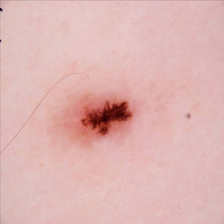

In [ ]:
# Display image for reference

benign = torchvision.io.read_image(f'{test_dir}/benign/1.jpg')
print("This is benign skin cancer")
T.ToPILImage()(benign)

This is malignant skin cancer


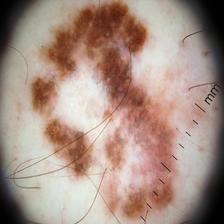

In [ ]:
malignant = torchvision.io.read_image(f'{test_dir}/malignant/44.jpg')
print("This is malignant skin cancer")
T.ToPILImage()(malignant)

## **Data Preprocess**

1. Define Training Data Transformations:

    * Use transforms.Compose to create a sequence of transformations.
    * Include the following transformations:
        * Resize the image to 224x224 pixels.
        * Randomly resize and crop the image to 224x224 pixels.
        * Randomly flip the image horizontally.
        * Convert the image to a PyTorch tensor.
        * Normalize the image with mean [0.485, 0.456, 0.406] and standard deviation [0.229, 0.224, 0.225].

2. Define Testing Data Transformations:

    * Use transforms.Compose to create a sequence of transformations.
    * Include the following transformations:
        * Resize the image to 224x224 pixels.
        * Center crop the image to 224x224 pixels.
        * Convert the image to a PyTorch tensor.
        * Normalize the image with mean [0.485, 0.456, 0.406] and standard deviation [0.229, 0.224, 0.225].

In [ ]:
# Define transformations for the training dataset
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),      # Resize the image to 224x224 pixels
    transforms.RandomResizedCrop(224),  # Randomly crop the image to 224x224 pixels
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally for data augmentation
    transforms.ToTensor(),              # Convert the image to a PyTorch tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize the image with mean and std
])

# Define transformations for the testing dataset
transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),      # Resize the image to 224x224 pixels
    transforms.CenterCrop((224, 224)),  # Crop the center of the image to 224x224 pixels
    transforms.ToTensor(),              # Convert the image to a PyTorch tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize the image with mean and std
])

1. Load the datasets:
    * Use datasets.ImageFolder to load the datasets.
    * Apply the transformations defined earlier.

In [ ]:
train_dataset = datasets.ImageFolder(train_dir, transforms_train)
test_dataset = datasets.ImageFolder(test_dir, transforms_test)

1. Create Data Loaders:
    * Use torch.utils.data.DataLoader to create a data loader for the datasets.
        * Set batch_size to 16.
        * Enable shuffle to True/False depending on the dataset you are creating data loader for.
        * Set num_workers to 0.

In [ ]:
BATCH = 16

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH, shuffle=True, num_workers=0)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH, shuffle=False, num_workers=0)

1. Print the dataset sizes.
2. Print the class names.

In [ ]:
print('Train dataset size:', len(train_dataset))
print('Test dataset size:', len(test_dataset))
class_names = train_dataset.classes
print('Class names:', class_names)

Train dataset size: 2077
Test dataset size: 660
Class names: ['benign', 'malignant']


1. Visualize some images
    * Use torchvision.utils.make_grid to create a grid of images.

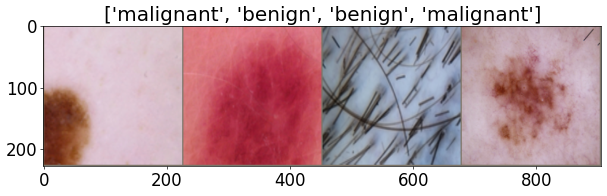

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})


def imshow(input, title):

    input = input.numpy().transpose((1, 2, 0)) # torch.Tensor => numpy

    # undo image normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)

    # display images
    plt.imshow(input)
    plt.title(title)
    plt.show()


# load a batch of train image
iterator = iter(train_dataloader)

# visualize a batch of train image
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:4])

imshow(out, title=[class_names[x] for x in classes[:4]])

## **Get and Customize the Model**

1. Load the pre-trained ResNet-18 model.
    * Use `models.resnet18(pretrained=True)` to load the pre-trained ResNet-18 model.

In [ ]:
model = models.resnet18(pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

1. Get the number of features.
    * Access the in_features attribute of the fully connected layer (fc) in the pre-trained ResNet-18 model.

In [ ]:
num_features = model.fc.in_features
print('Number of features from pre-trained model', num_features)

Number of features from pre-trained model 512


1. Modify the fully connected layer to make it compatible with our classification problem.
2. Move the model to the device.

In [ ]:
model.fc = nn.Linear(num_features, 2)
model = model.to(device)

## **Training**

1. Define the loss function.

    * Use `nn.CrossEntropyLoss()` to define the cross-entropy loss function. This loss function is commonly used for multi-class classification tasks.
2. Define the optimizer.

    * Use `optim.SGD` to define the stochastic gradient descent (SGD) optimizer.
    * Set the learning rate (lr) to 0.0001 and the momentum to 0.9.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

1. Set random seeds for both CPU and GPU to ensure reproducibility of results when running the models on different devices.

In [ ]:
# Set the random seeds

torch.manual_seed(42)
torch.cuda.manual_seed(42)

1. Store metrics in lists to later visualize the performance during training.

2. Define num_epochs to specify the number of epochs for training.

4. Training phase:

    * Set the model to training mode using model.train().
    * Iterate over batches of training data using the training data loader.
    * Move inputs and labels to the specified device (device).
    * Perform forward pass, compute loss, backpropagate gradients, and update model parameters.
    * Calculate and store training loss and accuracy for each epoch.
5. Testing phase:
    * Set the model to evaluation mode using model.eval().
    * Iterate over batches of testing data using the testing data loader.
    * Move inputs and labels to the specified device (device).
    * Perform forward pass and calculate testing loss and accuracy.
    * Calculate and store testing loss and accuracy for each epoch.

In [ ]:
# Initialize lists for storing metrics
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

num_epochs = 10             # Set the number of epochs
start_time = time.time()    # Record starting time

# Start training loop
for epoch in range(num_epochs):
    print("Epoch {} running".format(epoch+1))  # Print epoch message

    """ Training Phase """

    model.train()           # Set model to training mode
    running_loss = 0.0
    running_corrects = 0

    # Iterate over batches of training data
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        _, preds = torch.max(outputs, 1)  # Get predictions
        loss = criterion(outputs, labels)  # Calculate the loss

        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        # Update running loss and corrects
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset) * 100.0
    train_loss.append(epoch_loss)
    train_accuracy.append(epoch_acc.item())

    # Print training progress
    print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch+1, epoch_loss, epoch_acc, time.time() - start_time))

    """ Testing Phase """
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():  # No need for gradients during testing
        running_loss = 0.0
        running_corrects = 0

        # Iterate over batches of testing data
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)             # Forward pass
            _, preds = torch.max(outputs, 1)    # Get predictions
            loss = criterion(outputs, labels)   # Calculate the loss

            # Update running loss and corrects
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(test_dataset)
        epoch_acc = running_corrects.double() / len(test_dataset) * 100.0
        test_loss.append(epoch_loss)
        test_accuracy.append(epoch_acc.item())

        # Print testing progress
        print('[Test #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch+1, epoch_loss, epoch_acc, time.time() - start_time))


Epoch 0 running
[Train #1] Loss: 0.0103 Acc: 63.9865% Time: 993.2574s
[Test #1] Loss: 0.0103 Acc: 66.5152% Time: 1525.9926s
Epoch 1 running
[Train #2] Loss: 0.0085 Acc: 74.1454% Time: 2091.2993s
[Test #2] Loss: 0.0087 Acc: 75.6061% Time: 2150.3254s
Epoch 2 running
[Train #3] Loss: 0.0077 Acc: 76.3601% Time: 2714.2524s
[Test #3] Loss: 0.0078 Acc: 78.1818% Time: 2773.6058s
Epoch 3 running
[Train #4] Loss: 0.0072 Acc: 79.1045% Time: 3337.6564s
[Test #4] Loss: 0.0074 Acc: 79.6970% Time: 3396.2151s
Epoch 4 running
[Train #5] Loss: 0.0069 Acc: 79.4415% Time: 3960.2875s
[Test #5] Loss: 0.0071 Acc: 80.6061% Time: 4018.8851s
Epoch 5 running
[Train #6] Loss: 0.0066 Acc: 81.0303% Time: 4580.4640s
[Test #6] Loss: 0.0069 Acc: 81.3636% Time: 4638.8166s
Epoch 6 running
[Train #7] Loss: 0.0064 Acc: 80.2118% Time: 5198.0808s
[Test #7] Loss: 0.0067 Acc: 81.6667% Time: 5256.4680s
Epoch 7 running
[Train #8] Loss: 0.0064 Acc: 81.0303% Time: 5817.6488s
[Test #8] Loss: 0.0066 Acc: 81.2121% Time: 5876.0947s
E

1. Save the model.

In [ ]:
save_path = 'custom-classifier_resnet_18_final.pth'
torch.save(model.state_dict(), save_path)

## **Evaluation**

### Plot train & test accuracy and train & test loss over time

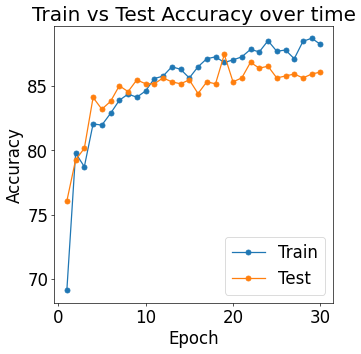

In [ ]:
# Plot
plt.figure(figsize=(6,6))
plt.plot(np.arange(1,num_epochs+1), train_accuracy,'-o')
plt.plot(np.arange(1,num_epochs+1), test_accuracy,'-o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuracy over time')
plt.show()

In [ ]:
# Plot
plt.figure(figsize=(6,6))
plt.plot(np.arange(1,num_epochs+1), train_loss,'-o')
plt.plot(np.arange(1,num_epochs+1), test_loss,'-o')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train','Test'])
plt.title('Train vs Test loss over time')
plt.show()

### Check the performance of each class

Draw a confusion matrix and heatmap plot for observation.

In [ ]:
# Get data to check on the performance of each label
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_dataloader:

        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs) # Feed Network
        outputs = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
        """
        looks for the maximum values along the dimension corresponding to num_classes (i.e., across the class probabilities for each sample in the batch).
        torch.max returns a tuple where the first element is the maximum values and the second element is the indices of those maximum values.

        torch.max(torch.exp(outputs), 1)[1]: Extracts the indices of the maximum values along the specified dimension. These indices represent
        the predicted class labels for each sample in the batch.
        """

        y_pred.extend(outputs) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

Accuracy on Training set:  0.8606060606060606
Confusion matrix: 
 [[313  47]
 [ 45 255]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       360
           1       0.84      0.85      0.85       300

    accuracy                           0.86       660
   macro avg       0.86      0.86      0.86       660
weighted avg       0.86      0.86      0.86       660



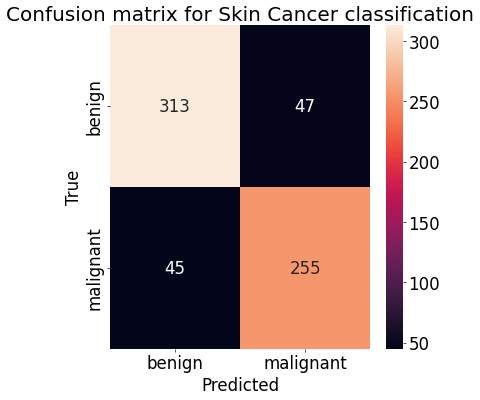

In [ ]:
classes = test_dataset.classes

# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Print metrics
print("Accuracy on Training set: ", accuracy)
print('Confusion matrix: \n', conf_matrix)
print('Classification report: \n', class_report)

# Convert confusion matrix to a DataFrame for easier plotting
df_cm = pd.DataFrame(conf_matrix, index=[i for i in classes], columns=[i for i in classes])

# Set up the matplotlib figure
plt.figure(figsize=(7, 7))

# Set the title for the heatmap
plt.title("Confusion matrix for Skin Cancer classification")

# Plot the heatmap
sns.heatmap(df_cm, annot=True, fmt='g')  # fmt='g' ensures integer format

# Display the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()